In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.descriptors import CoulombMatrixSpectrum
from classes.pca import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA as skPCA
plt.rc('animation', html='jshtml')

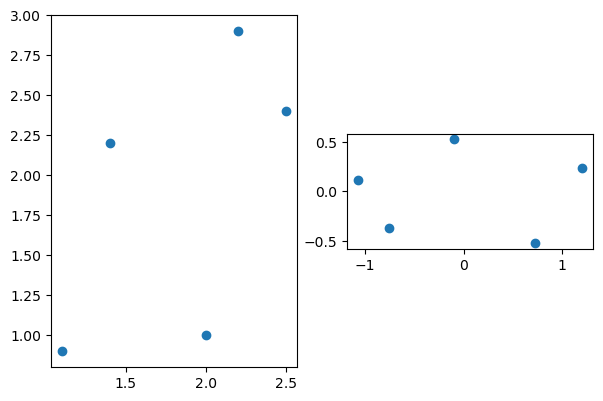

In [3]:
fig, axs = plt.subplots(1,2, figsize=(7,5))
axs[0].set_aspect("equal")
axs[1].set_aspect("equal")

data = np.array([[2.5, 2.4],
          [2.0, 1.0],
          [2.2, 2.9],
          [1.4, 2.2],
          [1.1, 0.9]])
pca = PCA(n_components=2)
pca.fit(data=data)
trans_data = pca.transform(data=data)

axs[0].plot(data[:,0], data[:,1], 'o')
axs[1].plot(trans_data[:,0], trans_data[:,1], 'o')

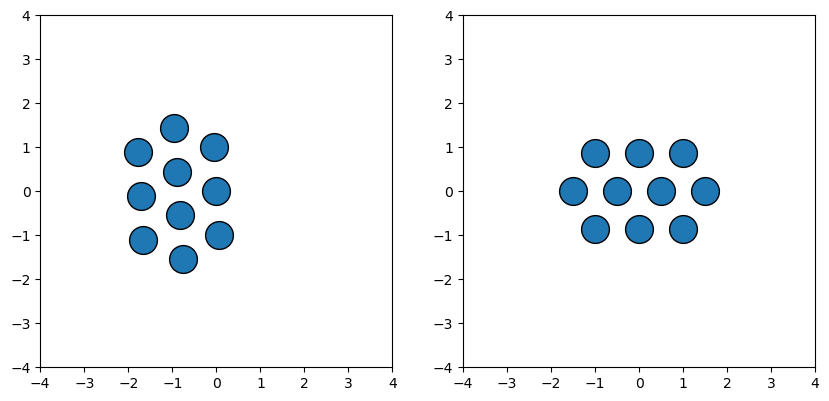

In [5]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos, size=20) for pos in poses]) for poses in positions]
data = atom_cols[17].get_positions()
pca = PCA(2)
pca.fit(data=data)
trans_data = pca.transform(data=data)
atom_col_rotated = Atom_Collection(atomlist=[Atom(position=pos, size=20) for pos in trans_data])

fig, axs = plt.subplots(1,2, figsize=(10,5))
for ax in axs:
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    ax.set_aspect("equal")
e = atom_col_rotated.plot(ax=axs[1])
e = atom_cols[17].plot(ax=axs[0])

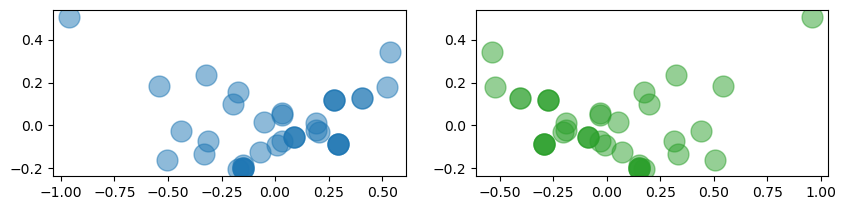

In [12]:
coul_desc = CoulombMatrixSpectrum()
descriptors = [coul_desc.get_descriptor(atom_col=atom_col) for atom_col in atom_cols]
pca = PCA(2)
skpca = skPCA(2)
pcas = [pca, skpca]
for pca in pcas:
    pca.fit(descriptors)

fig, axs = plt.subplots(1,2, figsize=(10,5))
for pca, ax, color in zip(pcas, axs, ["C0","C2"]):
    ax.set_aspect("equal")
    trans_data = pca.transform(descriptors)
    ax.plot(trans_data[:,0], trans_data[:,1], 'o', markersize=15, alpha=0.5, color=color)

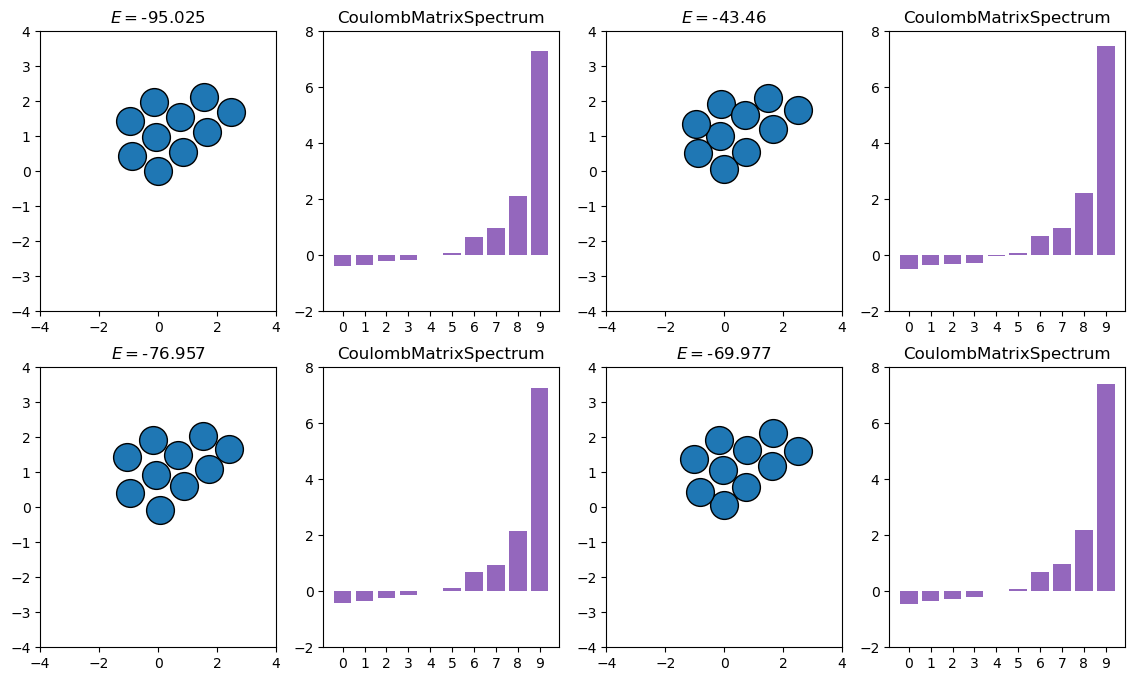

In [46]:
fig, axs = plt.subplots(2,4, figsize=(14,8))
atom_cols_for_rattling = [copy.deepcopy(atom_cols[2])  for i in range(4)]

for i, ax in enumerate(axs.reshape(4,2)):
    ax[0].set_xlim([-4,4])
    ax[0].set_ylim([-4,4])
    atom_cols_for_rattling[i].calculator = LennardJones()
    if i > 0:
        atom_cols_for_rattling[i].rattle_atoms(delta=0.08)
        atom_cols_for_rattling[i].plot(ax=ax[0])
        coul_desc.plot(atom_col=atom_cols_for_rattling[i], ax=ax[1])
        ax[0].set_title(rf"$E=${atom_cols_for_rattling[i].get_potential_energy().round(3)}")
    else:
        atom_cols_for_rattling[i].plot(ax=ax[0])
        ax[0].set_title(rf"$E=${atom_cols_for_rattling[i].get_potential_energy().round(3)}")
        coul_desc.plot(atom_col=atom_cols_for_rattling[i], ax=ax[1])

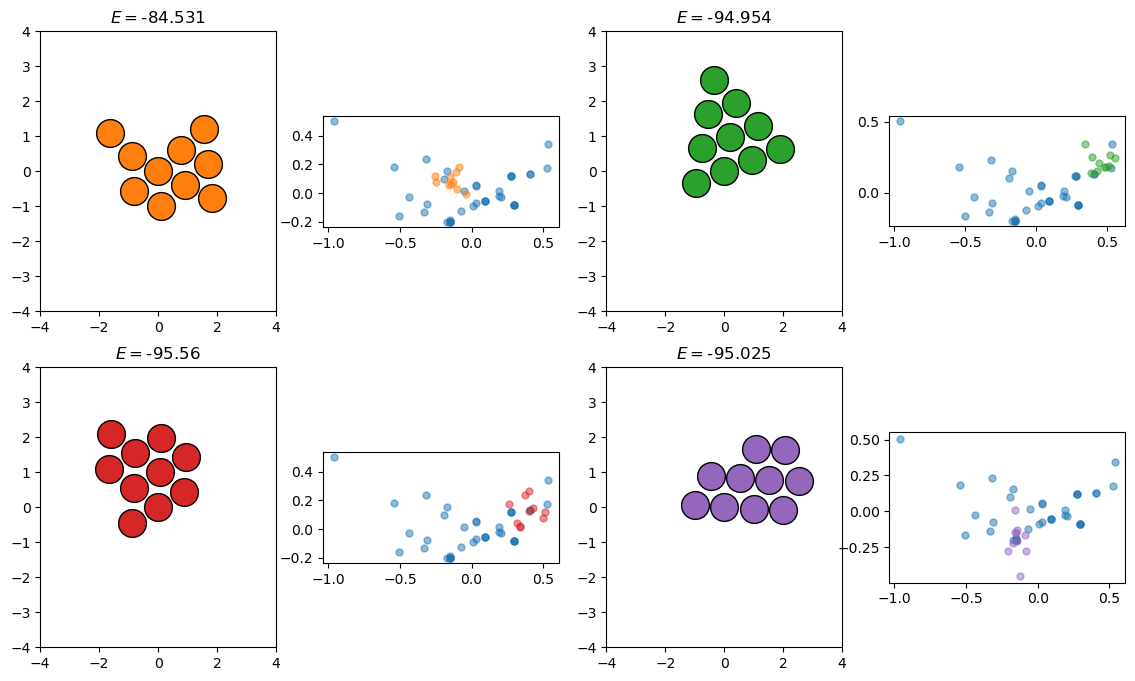

In [61]:
atom_cols_for_rattling = [copy.deepcopy(atom_cols[i+4])  for i in range(4)]
fig, axs = plt.subplots(2,4, figsize=(14,8))

pca = PCA(2)
pca.fit(data=descriptors)
trans_data = pca.transform(data=descriptors)
colors = ["C1", "C2", "C3", "C4"]
for ax, atom_col, color in zip(axs.reshape(4,2), atom_cols_for_rattling, colors):
    ax[0].set_xlim([-4,4])
    ax[0].set_ylim([-4,4])
    atom_col.calculator = LennardJones()
    atom_col.set_colors(colors=[color for i in range(len(atom_col))])
    ax[0].set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")
    atom_col.plot(ax=ax[0])
    ax[1].set_aspect("equal")
    ax[1].plot(trans_data[:,0], trans_data[:,1], 'o', markersize=5, alpha=0.5, color="C0")
    rattled_descriptors = []
    for i in range(10):
        atom_col_for_rattle = copy.deepcopy(atom_col)
        atom_col_for_rattle.rattle_atoms(delta=0.08)
        desc = coul_desc.get_descriptor(atom_col=atom_col_for_rattle)
        rattled_descriptors.append(desc)
    new_data = pca.transform(data=rattled_descriptors)
    ax[1].plot(new_data[:,0], new_data[:,1], 'o', markersize=5, alpha=0.5, color=color)